```shell

(venv) (base) taoyichen@MacBook-Pro-13 antico % python3 toy.py
hello antico
[read_c2m_data] cards: 2000 merchants: 1000 transactions: 106501
[run_antico] top 0  total_cards: 74  total_merchants: 50  score: 3.8173
[run_antico] top 1  total_cards: 26  total_merchants: 46  score: 1.0937
(np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0))

```

In [1]:
# demo
normal = [300, 300, 300, 300, 300]
spike = [5, 5, 100, 100, 1290]

def calc(tran):
    weighted_sum = 0
    for i, value in enumerate(tran):
        weighted_sum += (i + 1) * value
    return weighted_sum

print(calc(normal))
print(calc(spike))

4500
7165


In [2]:
import gzip

def read_card_data(files):
    cards = []
    try:
        for fname in files:
            with gzip.open(fname, 'rb') as f:
                for line in f.readlines()[1:]:
                    vals = line.decode().strip().split()
                    cid = str(vals[0])
                    quant = float(vals[1])
                    cards.append((cid, quant))
    except Exception as e:
        print(f'[{read_card_data.__name__}] {e}')
        print(f'[{read_card_data.__name__}] {fname}')
    return cards

def read_merchant_data(files):
    merchants = []
    try:
        for fname in files:
            with gzip.open(fname, 'rb') as f:
                for line in f.readlines()[1:]:
                    vals = line.decode().strip().split()
                    mid = str(vals[0])
                    prior = float(vals[1])
                    merchants.append((mid, prior))
    except Exception as e:
        print(f'[{read_merchant_data.__name__}] {e}')
        print(f'[{read_merchant_data.__name__}] {fname}')
    return merchants

def read_transaction_data(files):
    transactions = []
    try:
        for fname in files:
            with gzip.open(fname, 'rb') as f:
                for line in f.readlines()[1:]:
                    vals = line.decode().strip().split()
                    obj_a = str(vals[0])
                    obj_b = str(vals[1])
                    exp = float(vals[2])
                    ts = '{} {}'.format(vals[3], vals[4])
                    transactions.append((obj_a, obj_b, exp, ts))
    except Exception as e:
        print(f'[{read_transaction_data.__name__}] {e}')
        print(f'[{read_transaction_data.__name__}] {fname}')
    return transactions

card_data = read_card_data(["cards.gz"])
print(card_data[:5])

merchant_data = read_merchant_data(["merchants.gz"])
print(merchant_data[:5])

transaction_data = read_transaction_data(["transactions.gz"])
print(transaction_data[:5])

[read_card_data] [Errno 2] No such file or directory: 'cards.gz'
[read_card_data] cards.gz
[]
[read_merchant_data] [Errno 2] No such file or directory: 'merchants.gz'
[read_merchant_data] merchants.gz
[]
[read_transaction_data] [Errno 2] No such file or directory: 'transactions.gz'
[read_transaction_data] transactions.gz
[]


In [3]:
import gzip
from typing import List, Tuple

def read_card_data(file_paths: List[str]) -> List[Tuple[str, float]]:
    cards = []
    function_name = read_card_data.__name__

    for file_path in file_paths:
        try:
            with gzip.open(file_path, 'rt') as file:
                next(file)
                for line_number, line in enumerate(file, start=2):
                    parts = line.strip().split()
                    if len(parts) < 2:
                        print(f'[{function_name}] Incomplete data at {file_path} line {line_number}. Skipping.')
                        continue

                    card_id, quantity_str = parts[:2]
                    try:
                        quantity = float(quantity_str)
                        cards.append((card_id, quantity))
                    except ValueError:
                        print(f'[{function_name}] Invalid quantity "{quantity_str}" at {file_path} line {line_number}. Skipping.')
        except Exception as e:
            print(f'[{function_name}] Error processing file "{file_path}": {e}')

    return cards




card_data = read_card_data(["cards.gz"])
print(card_data[:5])

[read_card_data] Error processing file "cards.gz": [Errno 2] No such file or directory: 'cards.gz'
[]


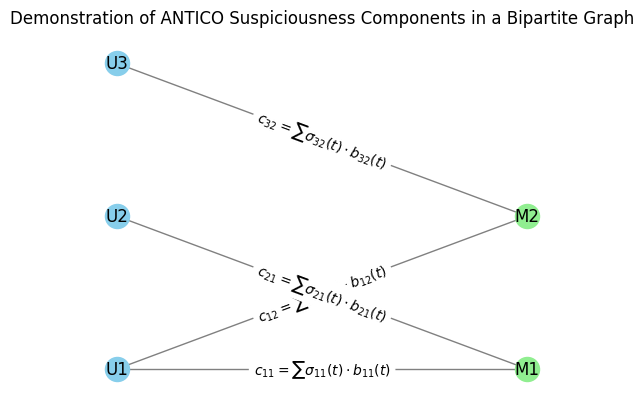

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
user_nodes = ["U1", "U2", "U3"]
merchant_nodes = ["M1", "M2"]
G.add_nodes_from(user_nodes, bipartite=0)
G.add_nodes_from(merchant_nodes, bipartite=1)
edges = [
    ("U1", "M1", r"$c_{11} = \sum \sigma_{11}(t) \cdot b_{11}(t)$"),
    ("U1", "M2", r"$c_{12} = \sum \sigma_{12}(t) \cdot b_{12}(t)$"),
    ("U2", "M1", r"$c_{21} = \sum \sigma_{21}(t) \cdot b_{21}(t)$"),
    ("U3", "M2", r"$c_{32} = \sum \sigma_{32}(t) \cdot b_{32}(t)$")
]
for u, m, label in edges:
    G.add_edge(u, m, label=label)
pos = {**{user: (0, i) for i, user in enumerate(user_nodes)},
       **{merchant: (1, i) for i, merchant in enumerate(merchant_nodes)}}
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color="skyblue", label="Users")
nx.draw_networkx_nodes(G, pos, nodelist=merchant_nodes, node_color="lightgreen", label="Merchants")
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="gray")
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Demonstration of ANTICO Suspiciousness Components in a Bipartite Graph")
plt.axis("off")
plt.show()

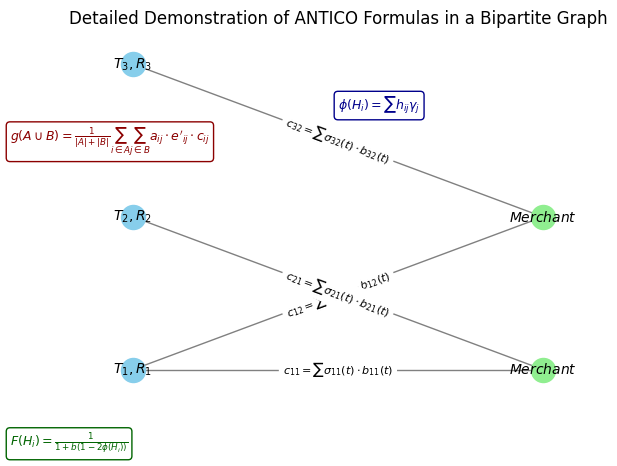

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
user_nodes = ["U1", "U2", "U3"]
merchant_nodes = ["M1", "M2"]
G.add_nodes_from(user_nodes, bipartite=0)
G.add_nodes_from(merchant_nodes, bipartite=1)
edges = [
    ("U1", "M1", r"$c_{11} = \sum \sigma_{11}(t) \cdot b_{11}(t)$"),
    ("U1", "M2", r"$c_{12} = \sum \sigma_{12}(t) \cdot b_{12}(t)$"),
    ("U2", "M1", r"$c_{21} = \sum \sigma_{21}(t) \cdot b_{21}(t)$"),
    ("U3", "M2", r"$c_{32} = \sum \sigma_{32}(t) \cdot b_{32}(t)$")
]
for u, m, label in edges:
    G.add_edge(u, m, label=label)
pos = {**{user: (0, i) for i, user in enumerate(user_nodes)},
       **{merchant: (1, i) for i, merchant in enumerate(merchant_nodes)}}
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color="skyblue", label="Users")
nx.draw_networkx_nodes(G, pos, nodelist=merchant_nodes, node_color="lightgreen", label="Merchants")
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="gray")
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
node_labels = {
    "U1": r"$T_1, R_1$", "U2": r"$T_2, R_2$", "U3": r"$T_3, R_3$",
    "M1": r"$Merchant$", "M2": r"$Merchant$"
}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
plt.text(-0.3, 1.5, r"$g(A \cup B) = \frac{1}{|A| + |B|} \sum_{i \in A} \sum_{j \in B} a_{ij} \cdot e'_{ij} \cdot c_{ij}$",
         fontsize=9, color="darkred", bbox=dict(facecolor="white", edgecolor="darkred", boxstyle="round,pad=0.3"))
plt.text(0.5, 1.7, r"$\phi(H_i) = \sum h_{ij} \gamma_j$", fontsize=9, color="darkblue",
         bbox=dict(facecolor="white", edgecolor="darkblue", boxstyle="round,pad=0.3"))
plt.text(-0.3, -0.5, r"$F(H_i) = \frac{1}{1 + b(1 - 2 \phi(H_i))}$", fontsize=9, color="darkgreen",
         bbox=dict(facecolor="white", edgecolor="darkgreen", boxstyle="round,pad=0.3"))
plt.title("Detailed Demonstration of ANTICO Formulas in a Bipartite Graph")
plt.axis("off")
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

card_data = read_card_data(["cards.gz"])
df = pd.DataFrame(card_data, columns=['cid', 'quant'])

df


[read_card_data] Error processing file "cards.gz": [Errno 2] No such file or directory: 'cards.gz'


,cid,quant


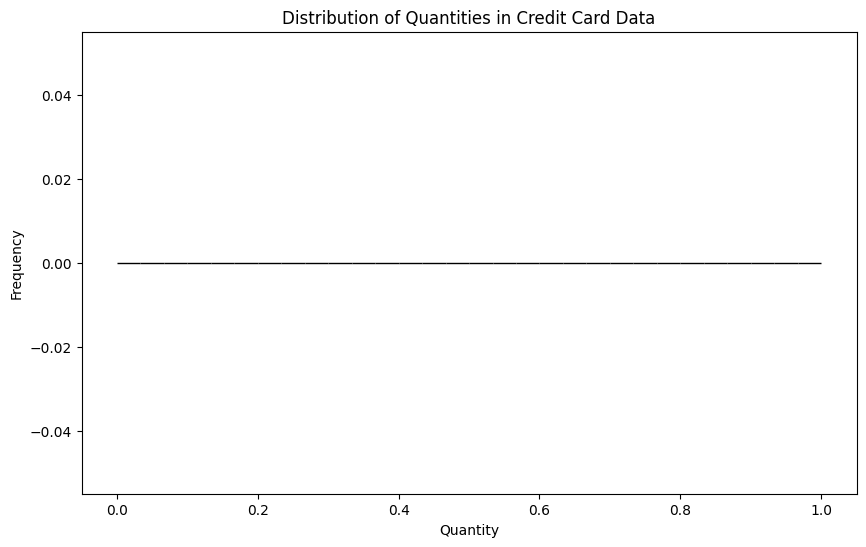

In [7]:

quant_data = df['quant']

plt.figure(figsize=(10, 6))
plt.hist(quant_data, bins=30, edgecolor='black')

plt.title('Distribution of Quantities in Credit Card Data')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


merchant_data = read_merchant_data(["merchants.gz"])
print(merchant_data[:5])
df = pd.DataFrame(merchant_data, columns=['mid', 'prior'])
df



[read_merchant_data] [Errno 2] No such file or directory: 'merchants.gz'
[read_merchant_data] merchants.gz
[]


,mid,prior


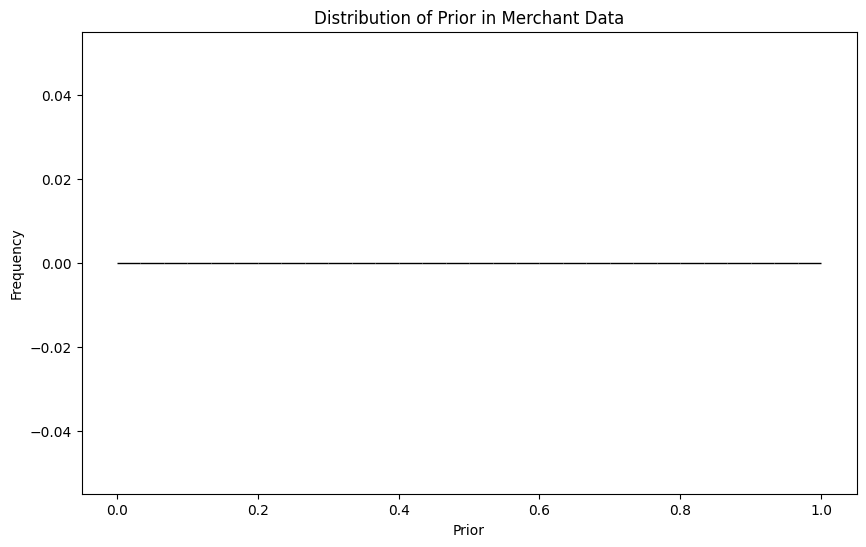

[read_transaction_data] [Errno 2] No such file or directory: 'transactions.gz'
[read_transaction_data] transactions.gz
[read_transaction_data] [Errno 2] No such file or directory: 'transactions.gz'
[read_transaction_data] transactions.gz


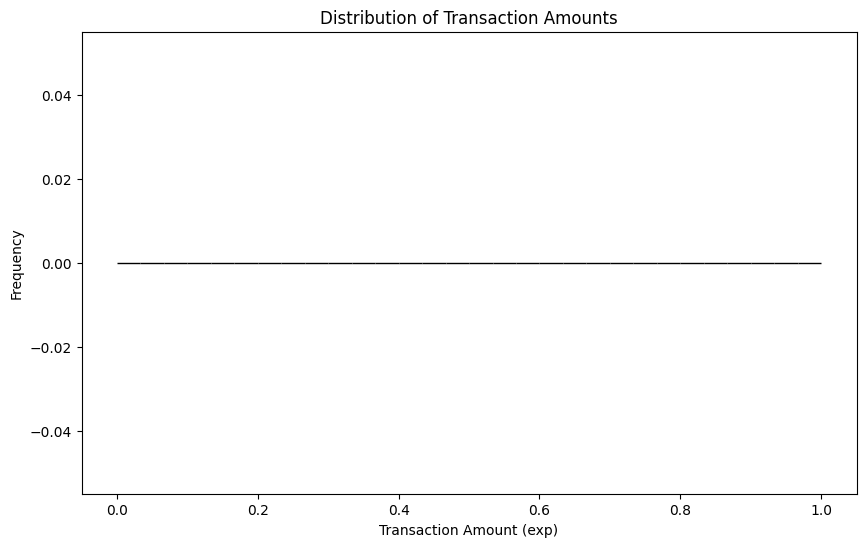

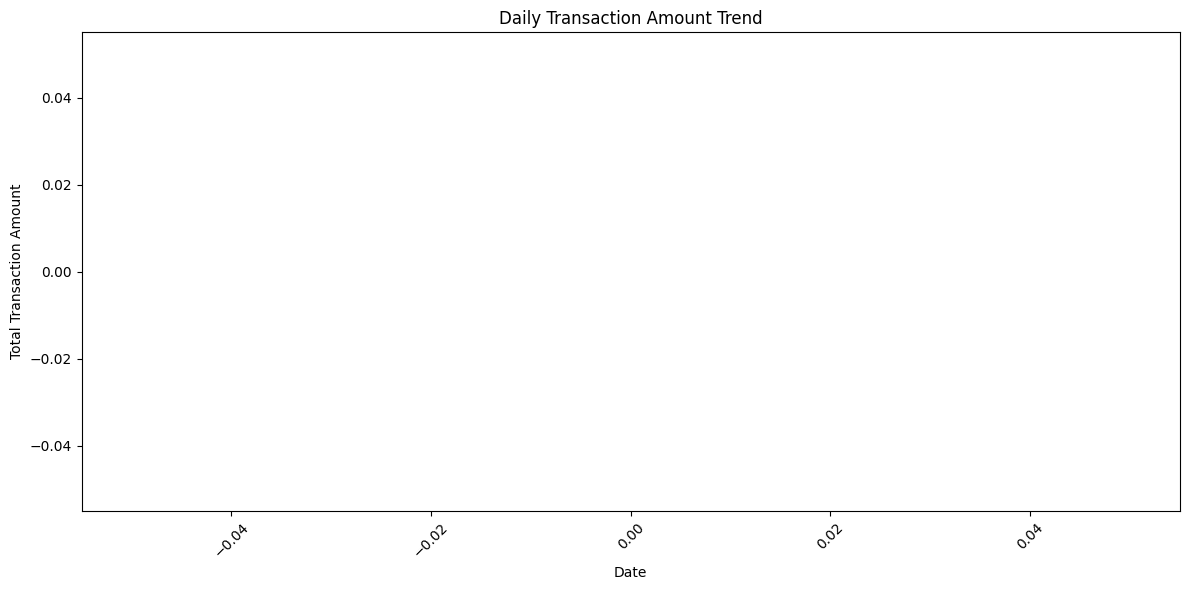

In [9]:

prior_data = df['prior']


plt.figure(figsize=(10, 6))  
plt.hist(prior_data, bins=30, edgecolor='black')  


plt.title('Distribution of Prior in Merchant Data')
plt.xlabel('Prior')
plt.ylabel('Frequency')


plt.show()

import pandas as pd
import matplotlib.pyplot as plt


transaction_data = read_transaction_data(["transactions.gz"])  
df = pd.DataFrame(transaction_data, columns=['cid', 'mid', 'exp', 'ts'])  
df

import pandas as pd
import matplotlib.pyplot as plt


transaction_data = read_transaction_data(["transactions.gz"])  
df = pd.DataFrame(transaction_data, columns=['cid', 'mid', 'exp', 'ts'])  


df['ts'] = pd.to_datetime(df['ts'], format='%Y-%m-%d %H:%M:%S')  


plt.figure(figsize=(10, 6))
plt.hist(df['exp'], bins=30, edgecolor='black')  
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount (exp)')
plt.ylabel('Frequency')
plt.show()



df['date'] = df['ts'].dt.date  


daily_trend = df.groupby('date')['exp'].sum()


plt.figure(figsize=(12, 6))
plt.plot(daily_trend.index, daily_trend.values, marker='o')  
plt.title('Daily Transaction Amount Trend')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


[read_c2m_data] cards: 2000 merchants: 1000 transactions: 106501
[run_antico] top 0  total_cards: 74  total_merchants: 50  score: 3.8173
[run_antico] top 1  total_cards: 26  total_merchants: 46  score: 1.0937
(np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0))
Total Number of Blocks: 2
Minimum Density Block: 1
Score of Least Dense Block: 1.093674928847785


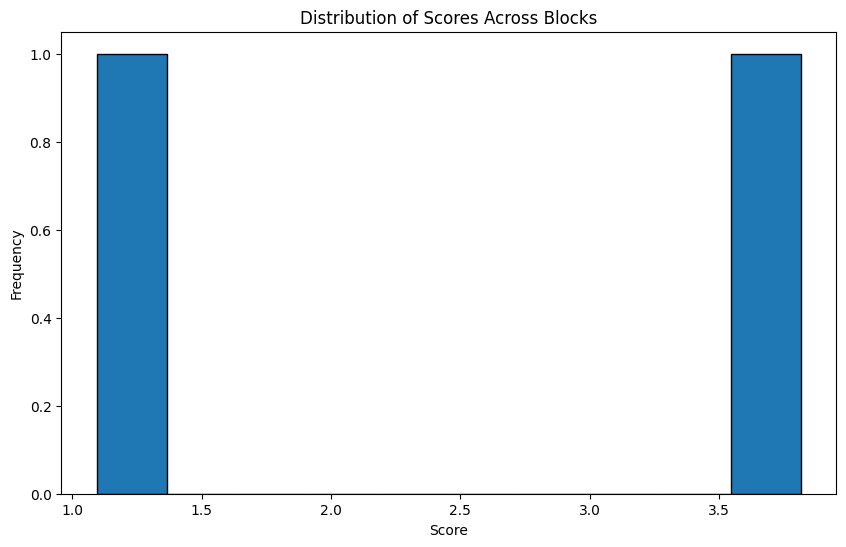

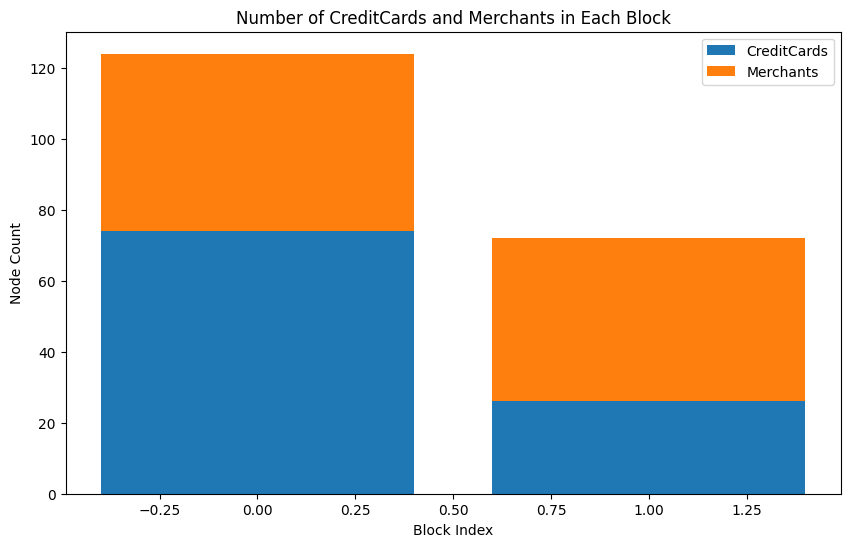

In [10]:
import sys
import os
import json
import matplotlib.pyplot as plt


def run_antico(graph, n_blocks=3, scoring=False):
    from antico.src.detect import detect_multiple
    from antico.src.detect import detect_multiple_scoring
    from antico.src.util.mat import transform
    from antico.src.greedy import fast_greedy_decreasing as eval_func

    func_name = run_antico.__name__
    detect_blocks = (detect_multiple_scoring if scoring else detect_multiple)
    smat, (cid2idx, idx2cid, mid2idx, idx2mid) = transform(graph)
    res = detect_blocks(smat, eval_func, n_blocks)

    data = []
    scores = []
    total_blocks = len(res)
    min_score_block = None
    min_score = float('inf')

    for i, r in enumerate(res):
        block = r[0]
        score = r[-1]
        scores.append(score)
        if score < min_score:
            min_score = score
            min_score_block = i

        if scoring:
            c_set = [(idx2cid[obj[0]], round(obj[1], 4)) for obj in block[0]]
            m_set = [(idx2mid[obj[0]], round(obj[1], 4)) for obj in block[1]]
        else:
            c_set = [idx2cid[i] for i in block[0]]
            m_set = [idx2mid[i] for i in block[1]]

        data.append({'Subgraph': (len(c_set), len(m_set)),
                     'Score': score,
                     'Nodes': {'CreditCard': c_set, 'Merchant': m_set}})
        print('[{}] top {}  total_cards: {}  total_merchants: {}  score: {}'.format(func_name, i, len(c_set), len(m_set), round(score, 4)))

    analysis_info = {
        'Total Blocks': total_blocks,
        'Min Score': min_score,
        'Min Score Block': min_score_block,
        'Scores': scores
    }

    return data, analysis_info

if __name__ == '__main__':
    from antico.case.read import read_c2m_data
    from antico.case.score import scoring
    from antico.src.graph import create_bigraph
    from antico.config import data_path
    from antico.config import start_date as start_t
    from antico.config import end_date   as end_t
    from antico.config import time_spans as spans

    c_filenames = ['cards.gz']
    m_filenames = ['merchants.gz']
    t_filenames = ['transactions.gz']
    input_params = {}
    input_params['Card']        = ['{}/{}'.format(data_path, fn) for fn in c_filenames]
    input_params['Merchant']    = ['{}/{}'.format(data_path, fn) for fn in m_filenames]
    input_params['Transaction'] = ['{}/{}'.format(data_path, fn) for fn in t_filenames]
    cards, merchants, transactions = read_c2m_data(input_params)

    args = {'Start': start_t, 'TimeSpan': spans}
    c_exps, m_exps = create_bigraph(transactions, cards, merchants, args)
    graph = [c_exps, m_exps]

    top_n = 2
    res, analysis_info = run_antico(graph, top_n, True)

    output_file = './blocks.json'
    with open(output_file, 'w') as f:
        json.dump(res, f)

    sc = scoring(res, cards, top_n)
    print(sc)

    print("Total Number of Blocks:", analysis_info['Total Blocks'])
    print("Minimum Density Block:", analysis_info['Min Score Block'])
    print("Score of Least Dense Block:", analysis_info['Min Score'])

    scores = analysis_info['Scores']
    plt.figure(figsize=(10, 6))
    plt.hist(scores, bins=10, edgecolor='black')
    plt.title('Distribution of Scores Across Blocks')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

    block_sizes = [(block['Subgraph'][0], block['Subgraph'][1]) for block in res]
    credit_card_counts, merchant_counts = zip(*block_sizes)

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(credit_card_counts)), credit_card_counts, label='CreditCards')
    plt.bar(range(len(merchant_counts)), merchant_counts, bottom=credit_card_counts, label='Merchants')
    plt.title('Number of CreditCards and Merchants in Each Block')
    plt.xlabel('Block Index')
    plt.ylabel('Node Count')
    plt.legend()
    plt.show()

In [11]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

def run_antico(graph, n_blocks=3, scoring=False):
    from antico.src.detect import detect_multiple
    from antico.src.detect import detect_multiple_scoring
    from antico.src.util.mat import transform
    from antico.src.greedy import fast_greedy_decreasing as eval_func

    func_name = run_antico.__name__
    detect_blocks = (detect_multiple_scoring if scoring else detect_multiple)
    smat, (cid2idx, idx2cid, mid2idx, idx2mid) = transform(graph)
    res = detect_blocks(smat, eval_func, n_blocks)

    data = []
    scores = []
    total_blocks = len(res)
    min_score_block = None
    min_score = float('inf')

    for i, r in enumerate(res):
        block = r[0]
        score = r[-1]
        scores.append(score)
        if score < min_score:
            min_score = score
            min_score_block = i

        if scoring:
            c_set = [(idx2cid[obj[0]], round(obj[1], 4)) for obj in block[0]]
            m_set = [(idx2mid[obj[0]], round(obj[1], 4)) for obj in block[1]]
        else:
            c_set = [idx2cid[i] for i in block[0]]
            m_set = [idx2mid[i] for i in block[1]]

        data.append({'Subgraph': (len(c_set), len(m_set)),
                     'Score': score,
                     'Nodes': {'CreditCard': c_set, 'Merchant': m_set}})
        print('[{}] top {}  total_cards: {}  total_merchants: {}  score: {}'.format(func_name, i, len(c_set), len(m_set), round(score, 4)))

    analysis_info = {
        'Total Blocks': total_blocks,
        'Min Score': min_score,
        'Min Score Block': min_score_block,
        'Scores': scores
    }

    return data, analysis_info
from antico.case.read import read_c2m_data
from antico.src.graph import create_bigraph
from antico.config import start_date as start_t
from antico.config import end_date   as end_t
from antico.config import time_spans as spans

c_filenames = ['cards.gz']
m_filenames = ['merchants.gz']
t_filenames = ['transactions.gz']
input_params = {
    'Card': [os.path.join(data_path, fn) for fn in c_filenames],
    'Merchant': [os.path.join(data_path, fn) for fn in m_filenames],
    'Transaction': [os.path.join(data_path, fn) for fn in t_filenames]
}

cards, merchants, transactions = read_c2m_data(input_params)

args = {'Start': start_t, 'TimeSpan': spans}
c_exps, m_exps = create_bigraph(transactions, cards, merchants, args)
graph = [c_exps, m_exps]

top_n = 2

res, analysis_info = run_antico(graph, top_n, scoring=True)

print("Total Number of Blocks:", analysis_info['Total Blocks'])
print("Minimum Density Block:", analysis_info['Min Score Block'])
print("Score of Least Dense Block:", analysis_info['Min Score'])

output_file = './blocks.json'
with open(output_file, 'w') as f:
    json.dump(res, f)

print("Results saved to", output_file)
pd.DataFrame(res).head()

[read_c2m_data] cards: 2000 merchants: 1000 transactions: 106501
[run_antico] top 0  total_cards: 74  total_merchants: 50  score: 3.8173
[run_antico] top 1  total_cards: 26  total_merchants: 46  score: 1.0937
Total Number of Blocks: 2
Minimum Density Block: 1
Score of Least Dense Block: 1.093674928847785
Results saved to ./blocks.json


,Subgraph,Score,Nodes
0,"(74, 50)",3.817330,"{'CreditCard': [('377747817857452', 7.5924), ('4841855241496', 6.1574), ('5289376839195414', 6.6248), ('4814681814927', 5.2982), ('377569274846269', 11.1008), ('5536899254668376', 6.4768), ('364345979249991', 5.5868), ('4421246322116585', 7.6228), ('5171512996545998', 6.8622), ('4935793959126', 4.6253), ('344443556335898', 5.9868), ('4687557246154', 5.4033), ('367132933746776', 5.7638), ('4959792721159163', 8.7535), ('4851945597566791', 5.4858), ('364251426971189', 6.9779), ('4534271359886417', 6.9754), ('5494555722451221', 8.4093), ('4754431948176794', 6.0385), ('4594139239723463', 6.8339), ('5118345454529154', 5.133), ('4399759393761566', 10.8418), ('5339552327955861', 5.2927), ('5418899564275931', 4.966), ('4679525774744443', 7.6642), ('5247779671475417', 5.2987), ('46811298156210', 5.2739), ('5297968219197679', 4.2497), ('45411744378614710', 9.324), ('5421343127842841', 9.8646), ('4746866443249', 4.9664), ('4353524871361436', 8.4162), ('4379877638118691', 7.114), ('4867677442181276', 8.75), ('5531439159859484', 8.918), ('4274788337779', 4.7573), ('43654297256110', 4.4514), ('4854713135347752', 5.6662), ('5348816597376747', 7.9152), ('4728858146444', 6.7416), ('5573993592242194', 6.973), ('352222747156358', 4.2378), ('4863411281931', 4.8518), ('5281984291366536', 7.6803), ('4532678913185', 4.3624), ('48666694982395710', 10.5182), ('343457119215679', 5.5939), ('5269643145733228', 8.9626), ('348465677448223', 4.0239), ('4767881323141935', 4.1269), ('4983833395796821', 7.2432), ('4523222987725488', 4.1734), ('4595755587164', 5.5127), ('4393761689335', 5.9192), ('4417224381238', 4.1541), ('4672448589531177', 4.983), ('4736555463586228', 4.9774), ('4873538336891945', 4.0897), ('375434942716554', 4.7849), ('348377897953132', 6.3415), ('5127645543237258', 5.6414), ('5588618786921286', 5.3183), ('343186748843672', 8.273), ('362175997521572', 5.0127), ('51175786426719810', 3.9959), ('5447569533667279', 5.0286), ('354164726111467', 4.4586), ('4243558825599158', 11.3554), ('4781167336834', 11.519), ('352422876442559', 4.8484), ('41386451773410', 3.9372), ('5384427921279865', 6.8422), ('4335343595619612', 4.8351), ('5549681788586588', 8.5926)], 'Merchant': [('6011529232745895', 11.9682), ('6011376751483387', 10.2796), ('6011598699318645', 9.9134), ('6011644794182575', 8.963), ('6011393794739139', 6.6941), ('6011343824892671', 10.2656), ('60119487761254810', 9.5536), ('6011768883147437', 8.4554), ('6011869715389781', 9.7774), ('6011935863494994', 12.1223), ('6011332752239419', 9.7282), ('6011878746983561', 9.8872), ('6011481184678627', 10.2685), ('6011962884363396', 9.1245), ('6011384513171613', 8.7107), ('6011751472511924', 10.0515), ('60117624414342710', 8.7881), ('6011227964468345', 10.3595), ('6011631842359263', 8.3148), ('6011662712456673', 11.0318), ('6011442667678385', 9.8239), ('6011226525124165', 8.2704), ('6011748578884817', 9.197), ('60111472996475310', 7.0165), ('6011485641757759', 8.8824), ('6011123943927644', 9.2052), ('6011459868186554', 9.6971), ('6011966114211598', 7.9373), ('6011563781198636', 8.9697), ('60119131941292910', 8.4891), ('6011941324897148', 10.0738), ('6011944239137626', 9.9127), ('6011255769455944', 8.5784), ('6011175779917263', 10.357), ('60119724166151310', 10.0988), ('6011741848912377', 10.8593), ('6011412511739626', 10.1098), ('6011263785121292', 9.3212), ('6011992848149318', 10.6485), ('6011339971158379', 10.3124), ('6011915315993694', 10.7618), ('6011385257943984', 8.4972), ('60116817799997310', 9.0671), ('6011388797489294', 10.4286), ('6011429997795443', 9.3047), ('60112973292664610', 7.0614), ('60115867262764810', 9.1325), ('6011499639941747', 7.27), ('6011852916756768', 10.7858), ('6011339871625428', 9.0225)]}"
1,"(26, 46)",1.093675,"{'CreditCard': [('4218196327637134', 3.6026), ('4255132857841386', 2.6521), ('4367669827478', 3.4486), ('359125276477777', 2.867), ('368257865669651', 2.3688), ('4343821337946211', 2.4558), ('363413813487465', 3.4066), ('5

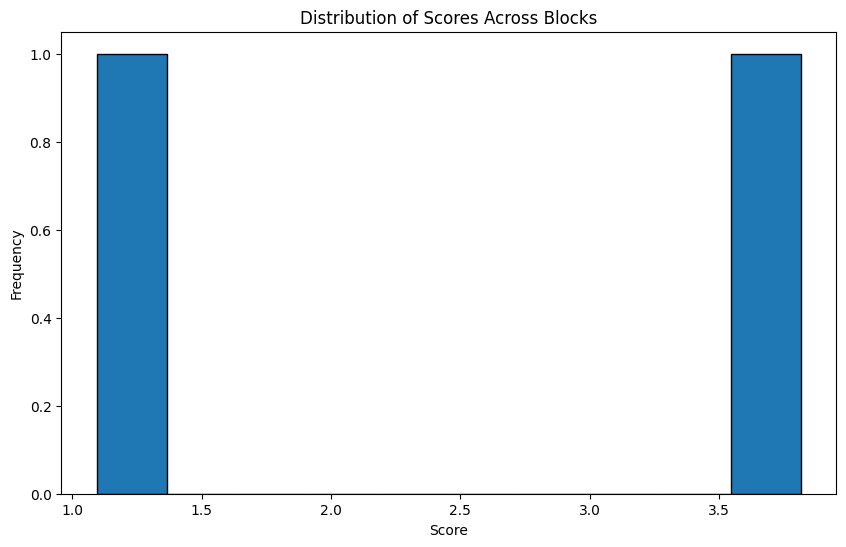

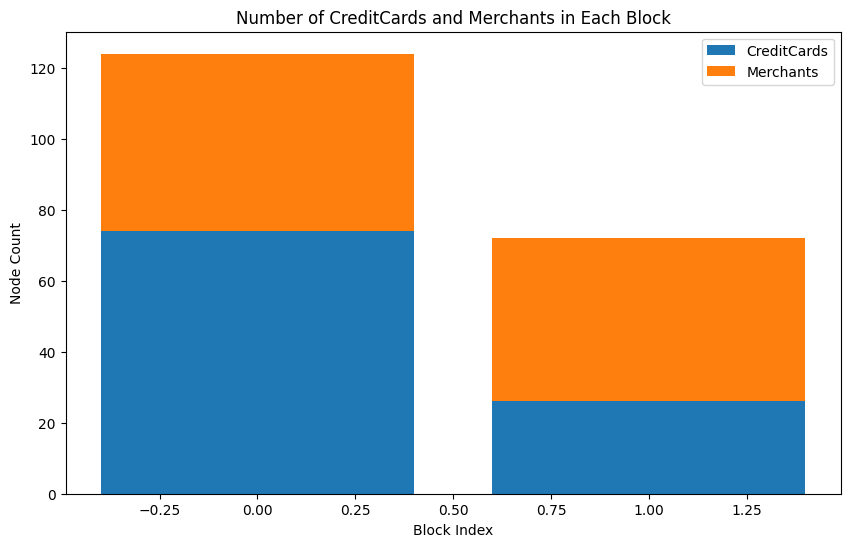

In [12]:

scores = analysis_info['Scores']
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=10, edgecolor='black')
plt.title('Distribution of Scores Across Blocks')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

block_sizes = [(block['Subgraph'][0], block['Subgraph'][1]) for block in res]
credit_card_counts, merchant_counts = zip(*block_sizes)

plt.figure(figsize=(10, 6))
plt.bar(range(len(credit_card_counts)), credit_card_counts, label='CreditCards')
plt.bar(range(len(merchant_counts)), merchant_counts, bottom=credit_card_counts, label='Merchants')
plt.title('Number of CreditCards and Merchants in Each Block')
plt.xlabel('Block Index')
plt.ylabel('Node Count')
plt.legend()
plt.show()


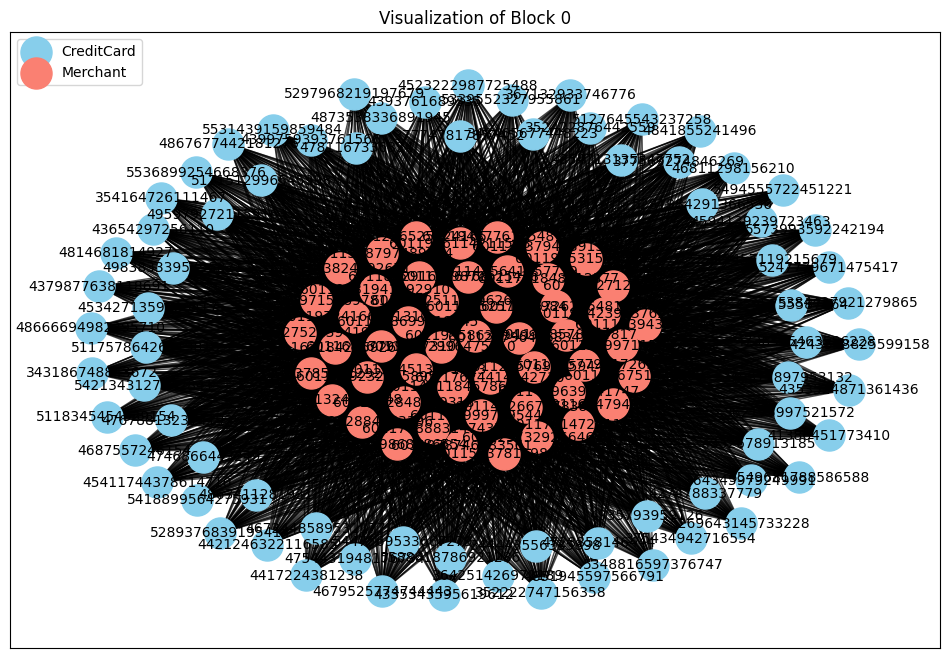

In [13]:
import json
import networkx as nx
import matplotlib.pyplot as plt

with open('blocks.json', 'r') as f:
    blocks = json.load(f)

block_index = 0
selected_block = blocks[block_index]

credit_card_nodes = selected_block['Nodes']['CreditCard']
merchant_nodes = selected_block['Nodes']['Merchant']

G = nx.Graph()
G.add_nodes_from([cc[0] for cc in credit_card_nodes], bipartite=0, label='CreditCard')
G.add_nodes_from([m[0] for m in merchant_nodes], bipartite=1, label='Merchant')

for cc in credit_card_nodes:
    for m in merchant_nodes:
        G.add_edge(cc[0], m[0])

pos = nx.spring_layout(G, k=0.3, seed=42)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, nodelist=[cc[0] for cc in credit_card_nodes], node_color='skyblue', node_size=500, label='CreditCard')
nx.draw_networkx_nodes(G, pos, nodelist=[m[0] for m in merchant_nodes], node_color='salmon', node_size=500, label='Merchant')
nx.draw_networkx_edges(G, pos, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.legend(['CreditCard', 'Merchant'], loc='upper left')
plt.title(f'Visualization of Block {block_index}')
plt.show()

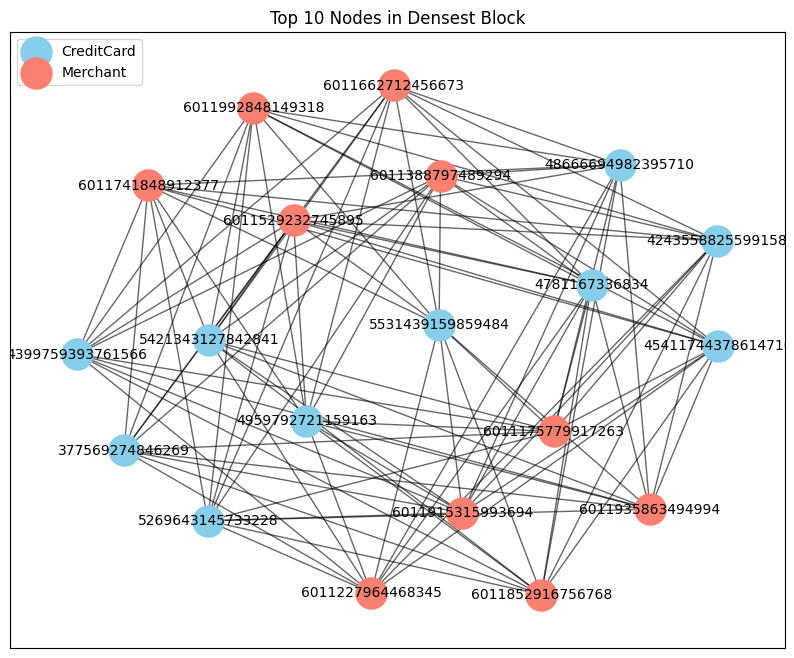

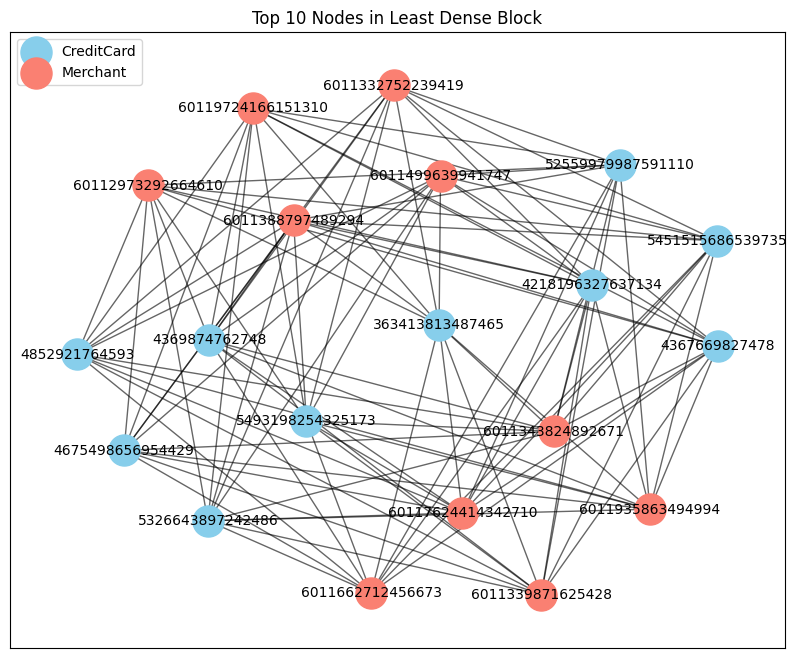

In [14]:
import json
import networkx as nx
import matplotlib.pyplot as plt

with open('blocks.json', 'r') as f:
    blocks = json.load(f)

blocks_sorted_by_score = sorted(blocks, key=lambda x: x['Score'], reverse=True)
densest_block = blocks_sorted_by_score[0]
least_dense_block = blocks_sorted_by_score[-1]

def get_top_nodes(block, top_n=10):
    credit_card_nodes = sorted(block['Nodes']['CreditCard'], key=lambda x: x[1], reverse=True)[:top_n]
    merchant_nodes = sorted(block['Nodes']['Merchant'], key=lambda x: x[1], reverse=True)[:top_n]
    return credit_card_nodes, merchant_nodes

top_cc_densest, top_merchant_densest = get_top_nodes(densest_block, top_n=10)
top_cc_least_dense, top_merchant_least_dense = get_top_nodes(least_dense_block, top_n=10)

def create_bipartite_graph(credit_card_nodes, merchant_nodes):
    G = nx.Graph()
    G.add_nodes_from([cc[0] for cc in credit_card_nodes], bipartite=0, label='CreditCard')
    G.add_nodes_from([m[0] for m in merchant_nodes], bipartite=1, label='Merchant')
    for cc in credit_card_nodes:
        for m in merchant_nodes:
            G.add_edge(cc[0], m[0])
    return G

G_densest = create_bipartite_graph(top_cc_densest, top_merchant_densest)
G_least_dense = create_bipartite_graph(top_cc_least_dense, top_merchant_least_dense)

def plot_bipartite_graph(G, title):
    pos = nx.spring_layout(G, k=0.3, seed=42)
    plt.figure(figsize=(10, 8))
    credit_card_nodes = [n for n, d in G.nodes(data=True) if d.get('label') == 'CreditCard']
    nx.draw_networkx_nodes(G, pos, nodelist=credit_card_nodes, node_color='skyblue', node_size=500, label='CreditCard')
    merchant_nodes = [n for n, d in G.nodes(data=True) if d.get('label') == 'Merchant']
    nx.draw_networkx_nodes(G, pos, nodelist=merchant_nodes, node_color='salmon', node_size=500, label='Merchant')
    nx.draw_networkx_edges(G, pos, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.legend(['CreditCard', 'Merchant'], loc='upper left')
    plt.title(title)
    plt.show()

plot_bipartite_graph(G_densest, 'Top 10 Nodes in Densest Block')
plot_bipartite_graph(G_least_dense, 'Top 10 Nodes in Least Dense Block')

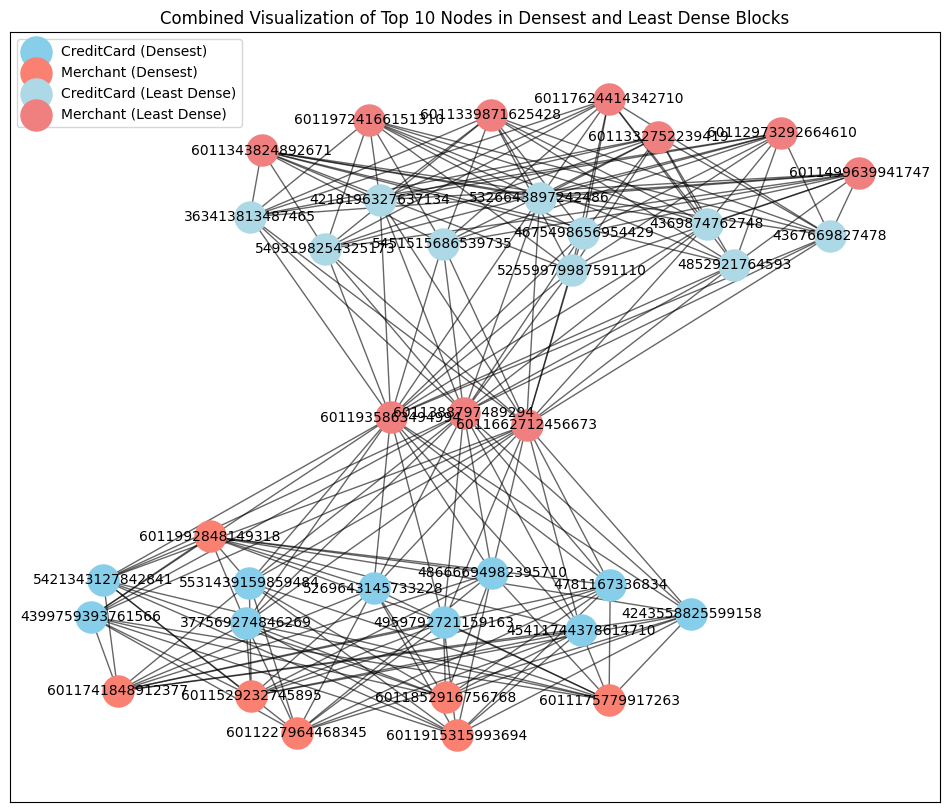

In [15]:
import json
import networkx as nx
import matplotlib.pyplot as plt

with open('blocks.json', 'r') as f:
    blocks = json.load(f)

blocks_sorted_by_score = sorted(blocks, key=lambda x: x['Score'], reverse=True)
densest_block = blocks_sorted_by_score[0]
least_dense_block = blocks_sorted_by_score[-1]

def get_top_nodes(block, top_n=10):
    credit_card_nodes = sorted(block['Nodes']['CreditCard'], key=lambda x: x[1], reverse=True)[:top_n]
    merchant_nodes = sorted(block['Nodes']['Merchant'], key=lambda x: x[1], reverse=True)[:top_n]
    return credit_card_nodes, merchant_nodes

top_cc_densest, top_merchant_densest = get_top_nodes(densest_block, top_n=10)
top_cc_least_dense, top_merchant_least_dense = get_top_nodes(least_dense_block, top_n=10)

G = nx.Graph()

for cc in top_cc_densest:
    G.add_node(cc[0], type='CreditCard', block='Densest')
for m in top_merchant_densest:
    G.add_node(m[0], type='Merchant', block='Densest')

for cc in top_cc_least_dense:
    G.add_node(cc[0], type='CreditCard', block='Least Dense')
for m in top_merchant_least_dense:
    G.add_node(m[0], type='Merchant', block='Least Dense')

def add_edges(credit_card_nodes, merchant_nodes, graph):
    for cc in credit_card_nodes:
        for m in merchant_nodes:
            graph.add_edge(cc[0], m[0])

add_edges(top_cc_densest, top_merchant_densest, G)
add_edges(top_cc_least_dense, top_merchant_least_dense, G)

pos = nx.spring_layout(G, k=0.3, seed=42)
plt.figure(figsize=(12, 10))

cc_densest_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'CreditCard' and d['block'] == 'Densest']
merchant_densest_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'Merchant' and d['block'] == 'Densest']
nx.draw_networkx_nodes(G, pos, nodelist=cc_densest_nodes, node_color='skyblue', node_size=500, label='CreditCard (Densest)')
nx.draw_networkx_nodes(G, pos, nodelist=merchant_densest_nodes, node_color='salmon', node_size=500, label='Merchant (Densest)')

cc_least_dense_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'CreditCard' and d['block'] == 'Least Dense']
merchant_least_dense_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'Merchant' and d['block'] == 'Least Dense']
nx.draw_networkx_nodes(G, pos, nodelist=cc_least_dense_nodes, node_color='lightblue', node_size=500, label='CreditCard (Least Dense)')
nx.draw_networkx_nodes(G, pos, nodelist=merchant_least_dense_nodes, node_color='lightcoral', node_size=500, label='Merchant (Least Dense)')

nx.draw_networkx_edges(G, pos, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.legend(loc='upper left')
plt.title('Combined Visualization of Top 10 Nodes in Densest and Least Dense Blocks')
plt.show()

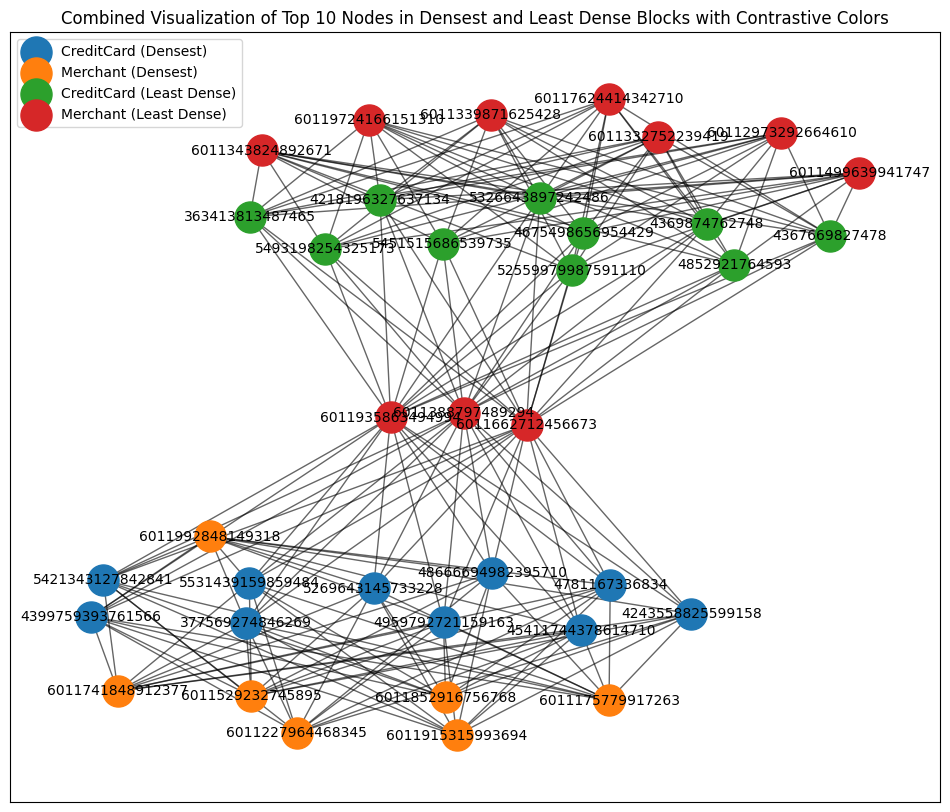

In [16]:
import json
import networkx as nx
import matplotlib.pyplot as plt

with open('blocks.json', 'r') as f:
    blocks = json.load(f)

blocks_sorted_by_score = sorted(blocks, key=lambda x: x['Score'], reverse=True)
densest_block = blocks_sorted_by_score[0]
least_dense_block = blocks_sorted_by_score[-1]

def get_top_nodes(block, top_n=10):
    credit_card_nodes = sorted(block['Nodes']['CreditCard'], key=lambda x: x[1], reverse=True)[:top_n]
    merchant_nodes = sorted(block['Nodes']['Merchant'], key=lambda x: x[1], reverse=True)[:top_n]
    return credit_card_nodes, merchant_nodes

top_cc_densest, top_merchant_densest = get_top_nodes(densest_block, top_n=10)
top_cc_least_dense, top_merchant_least_dense = get_top_nodes(least_dense_block, top_n=10)

G = nx.Graph()

for cc in top_cc_densest:
    G.add_node(cc[0], type='CreditCard', block='Densest')
for m in top_merchant_densest:
    G.add_node(m[0], type='Merchant', block='Densest')

for cc in top_cc_least_dense:
    G.add_node(cc[0], type='CreditCard', block='Least Dense')
for m in top_merchant_least_dense:
    G.add_node(m[0], type='Merchant', block='Least Dense')

def add_edges(credit_card_nodes, merchant_nodes, graph):
    for cc in credit_card_nodes:
        for m in merchant_nodes:
            graph.add_edge(cc[0], m[0])

add_edges(top_cc_densest, top_merchant_densest, G)
add_edges(top_cc_least_dense, top_merchant_least_dense, G)

pos = nx.spring_layout(G, k=0.3, seed=42)
plt.figure(figsize=(12, 10))

cc_densest_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'CreditCard' and d['block'] == 'Densest']
merchant_densest_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'Merchant' and d['block'] == 'Densest']
nx.draw_networkx_nodes(G, pos, nodelist=cc_densest_nodes, node_color='#1f77b4', node_size=500, label='CreditCard (Densest)')
nx.draw_networkx_nodes(G, pos, nodelist=merchant_densest_nodes, node_color='#ff7f0e', node_size=500, label='Merchant (Densest)')

cc_least_dense_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'CreditCard' and d['block'] == 'Least Dense']
merchant_least_dense_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'Merchant' and d['block'] == 'Least Dense']
nx.draw_networkx_nodes(G, pos, nodelist=cc_least_dense_nodes, node_color='#2ca02c', node_size=500, label='CreditCard (Least Dense)')
nx.draw_networkx_nodes(G, pos, nodelist=merchant_least_dense_nodes, node_color='#d62728', node_size=500, label='Merchant (Least Dense)')

nx.draw_networkx_edges(G, pos, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.legend(loc='upper left')
plt.title('Combined Visualization of Top 10 Nodes in Densest and Least Dense Blocks with Contrastive Colors')
plt.show()

   Block     Score  CreditCards  Merchants  TotalNodes  CC_to_Merchant_Ratio
0      0  3.817330           74         50         124              1.480000
1      1  1.093675           26         46          72              0.565217


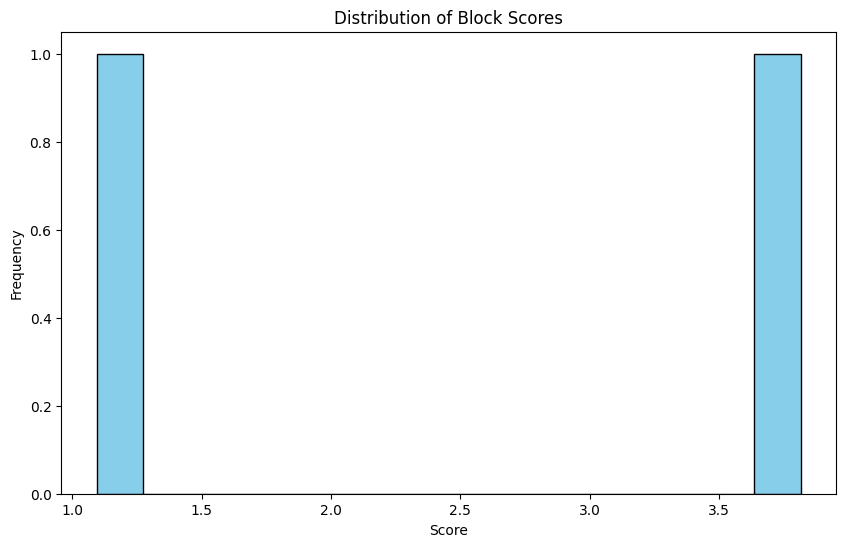

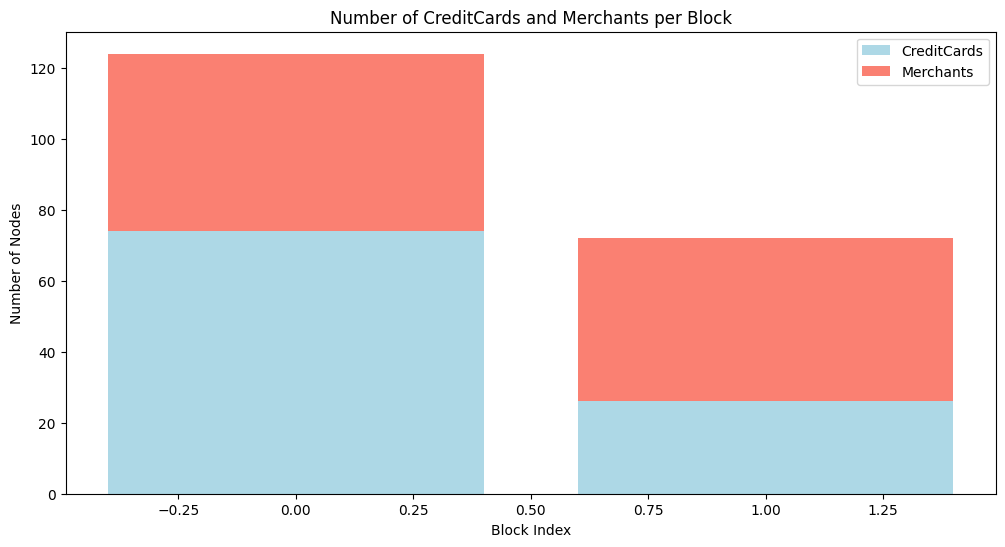

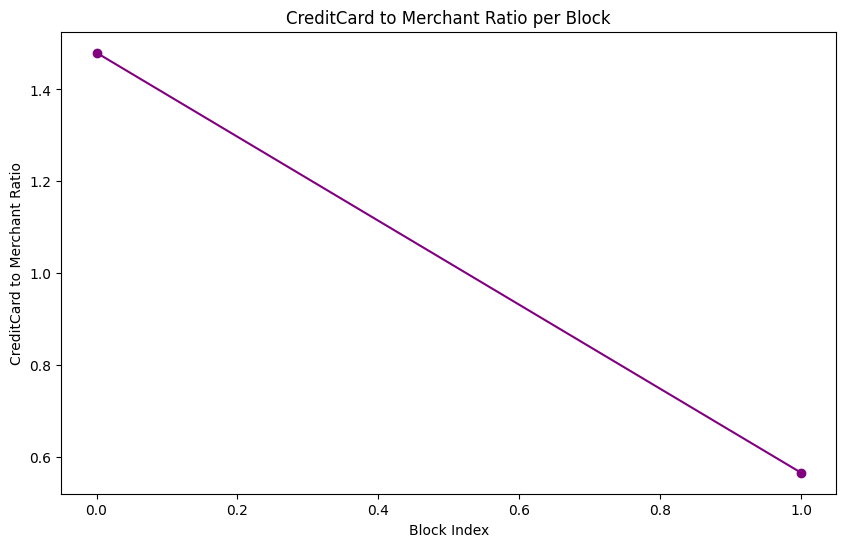

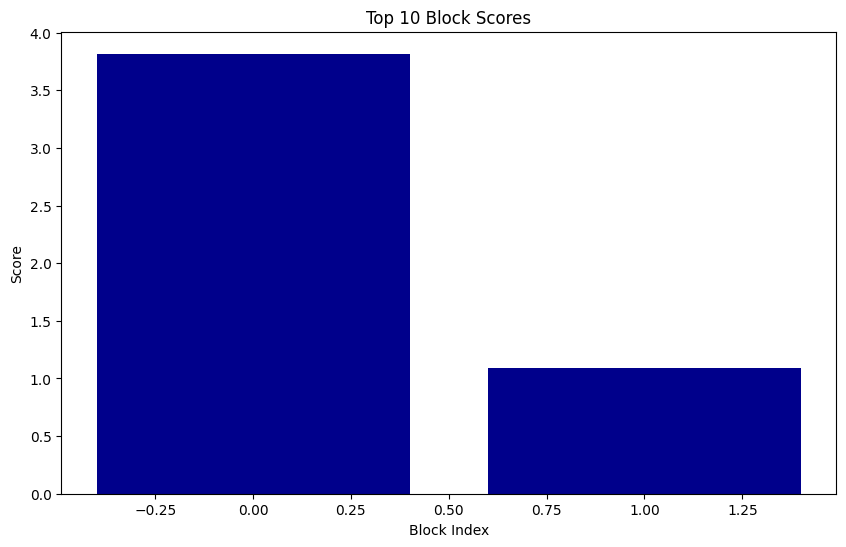

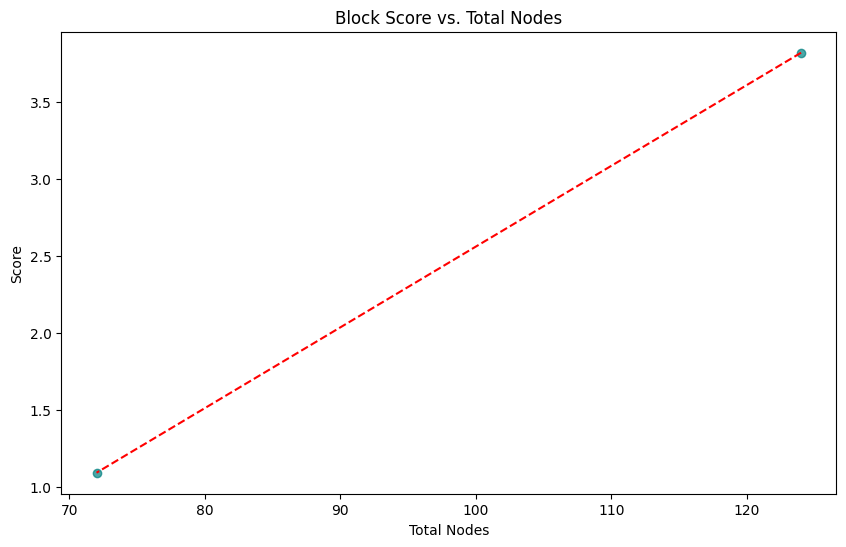

In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

with open('blocks.json', 'r') as f:
    blocks = json.load(f)

data = []
for i, block in enumerate(blocks):
    score = block['Score']
    num_credit_cards = len(block['Nodes']['CreditCard'])
    num_merchants = len(block['Nodes']['Merchant'])
    total_nodes = num_credit_cards + num_merchants
    cc_to_merchant_ratio = num_credit_cards / num_merchants if num_merchants > 0 else None
    data.append({
        'Block': i,
        'Score': score,
        'CreditCards': num_credit_cards,
        'Merchants': num_merchants,
        'TotalNodes': total_nodes,
        'CC_to_Merchant_Ratio': cc_to_merchant_ratio
    })

df = pd.DataFrame(data)

print(df.head())

plt.figure(figsize=(10, 6))
plt.hist(df['Score'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Block Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(df['Block'], df['CreditCards'], color='lightblue', label='CreditCards')
plt.bar(df['Block'], df['Merchants'], bottom=df['CreditCards'], color='salmon', label='Merchants')
plt.title('Number of CreditCards and Merchants per Block')
plt.xlabel('Block Index')
plt.ylabel('Number of Nodes')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['Block'], df['CC_to_Merchant_Ratio'], marker='o', linestyle='-', color='purple')
plt.title('CreditCard to Merchant Ratio per Block')
plt.xlabel('Block Index')
plt.ylabel('CreditCard to Merchant Ratio')
plt.show()

top_10_blocks = df.nlargest(10, 'Score')
plt.figure(figsize=(10, 6))
plt.bar(top_10_blocks['Block'], top_10_blocks['Score'], color='darkblue')
plt.title('Top 10 Block Scores')
plt.xlabel('Block Index')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['TotalNodes'], df['Score'], color='teal', alpha=0.7)
plt.title('Block Score vs. Total Nodes')
plt.xlabel('Total Nodes')
plt.ylabel('Score')
m, b = np.polyfit(df['TotalNodes'], df['Score'], 1)
plt.plot(df['TotalNodes'], m * df['TotalNodes'] + b, color='red', linestyle='--')
plt.show()

In [18]:
from __future__ import division
import os
import sys
import json
import cProfile
import gzip
import numpy as np
import math
from scipy import sparse
import datetime as dt
from functools import reduce
from math import e
import pandas as pd

In [19]:
data_path = './data'
date_format = '%Y-%m-%d'
datetime_format = '%Y-%m-%d %H:%M:%S'
metric = 'gini2'
fusion = 'mul'
start_date = '2020-09-01'
start_t = start_date
time_spans = [30,31]
spans = time_spans
fmt = date_format
fmt1 = date_format
fmt2 = datetime_format
default_fusion_key = fusion

In [20]:

from __future__ import division
import os
import sys
import json
import cProfile
import gzip
import numpy as np
import math
from scipy import sparse
import datetime as dt
from math import e
import pandas as pd
from numba import njit


In [21]:
data_path = './data'
date_format = '%Y-%m-%d'
datetime_format = '%Y-%m-%d %H:%M:%S'
metric = 'gini2'
fusion = 'mul'
start_date = '2020-09-01'
start_t = start_date
time_spans = [30,31]
spans = time_spans
fmt = date_format
fmt1 = date_format
fmt2 = datetime_format
default_fusion_key = fusion

In [22]:
def mul_fusion(arr):
    n_m = len(arr)
    if n_m > 0:
        val = arr[0]
        for i in range(1, n_m):
            val *= arr[i]
        return val.mean()
    return -1

def exp_fusion(arr, b=e):
    n_m = len(arr)
    if n_m > 0:
        val = arr[0]
        for i in range(1, n_m):
            val += arr[i]
        return (b**(val - len(arr[0]))).mean()
    return -1

def sigmoid_fusion(arr, a=e, b=10, c=20, d=[]):
    n_m = len(arr)
    if n_m > 0:
        wgts = d if len(d) == n_m else [1 / n_m] * n_m
        val = arr[0] * wgts[0]
        for i in range(1, n_m):
            val += arr[i] * wgts[i]
        return (1 / (1 + a**(b - c * val))).mean()
    return -1

fusion_dict = {'mul': mul_fusion, 'exp': exp_fusion, 'sig': sigmoid_fusion}
f_dict = fusion_dict

In [23]:
def cal_metrics(exps, n_days, quant, choice=None):
    m_key = (choice if choice else metric)
    cal_metric = (metric_dict[m_key] if m_key in metric_dict else None)
    df = pd.DataFrame(exps, columns=["transaction", "timestamp"])
    df['timestamp'] = pd.to_datetime(df['timestamp'], format = fmt)
    df_group = df.groupby([df['timestamp'].dt.date])['transaction'].agg(['sum','count'])
    sums = np.zeros(n_days)
    for (ts, row) in df_group.iterrows():
        idx = ts.day - 1
        sums[idx] = row['sum']
    t_agg_m = cal_metric(sums)
    c_opy_m = sum(sums) / float(quant)
    return (t_agg_m, c_opy_m)


def cal_vc(data):
    from scipy import stats
    mats = np.zeros((1,len(data)))
    mats[0,1] = sum(data)
    max_v = stats.variation(mats.ravel())
    min_v = 0
    rst = (stats.variation(data) - min_v) / (max_v - min_v)
    return rst
def cal_kurtosis(data):
    from scipy import stats
    mats = np.zeros((1,len(data)))
    mats[0,1] = sum(data)
    max_v = stats.kurtosis(mats.ravel(), fisher=False)
    min_v = 0
    rst = (stats.kurtosis(data) - min_v) / (max_v - min_v)
    return rst
def cal_gini_integral(data):
    func_name = cal_gini_integral.__name__
    try:
        cum_vals = np.cumsum(sorted(np.append(data, 0)))
        sum_vals = cum_vals[-1]
        xarray = np.array(range(0, len(cum_vals))) / np.float(len(cum_vals)-1)
        yarray = cum_vals / sum_vals
        B = np.trapz(yarray, x=xarray)
        A = 0.5 - B
        rst = A / (A+B)
    except Exception as e:
        print(e)
        print('[{}] gini: {}'.format(func_name, rst))
    return rst
def cal_gini_discrete(data):
    func_name = cal_gini_discrete.__name__
    try:
        n = len(data)
        a = sorted(np.append(data, 0))
        rst = 2 * sum(np.array(range(n+1)) * a) / (n * sum(a)) - (n + 1) / n
    except Exception as e:
        print(e)
        print('[{}] gini: {}'.format(func_name, rst))
    return rst
metric_dict = {'vc': cal_vc, 'kurt': cal_kurtosis, 'gini1': cal_gini_integral, 'gini2': cal_gini_discrete}


In [24]:
def load_param(data, key, value=None):
    return data.get(key, value)

In [25]:



def cal_interval_days(d, start_d):
    return abs((d - start_d).days)

In [26]:


def create_bigraph(exps_data, cards, merchants, args):
    start_t = load_param(args, 'Start')
    spans = load_param(args, 'TimeSpan')
    if start_t is None or spans is None:
        return None, None
    f_key = load_param(args, 'Fusion', default_fusion_key)
    c_dict = {c[0]: {'Transactions': [], 'Quant': c[1]} for c in cards}
    m_dict = {m[0]: m[-1] for m in merchants}
    m_set = set()
    for val in exps_data:
        cid = val[0]
        mid = val[1]
        exp = val[2]
        ts = val[3]
        m_set.add(mid)
        c_dict[cid]['Transactions'].append((mid, exp, ts))
    c_exps = {cid: [] for cid in c_dict}
    m_exps = {mid: [] for mid in m_set}
    for cid in c_dict:
        vals = cal_edge_weight(c_dict[cid]['Transactions'], c_dict[cid]['Quant'], start_t, spans, f_key)
        for mid in vals:
            wgt = vals[mid] * m_dict[mid]
            c_exps[cid].append((mid, wgt))
            m_exps[mid].append((cid, wgt))
    return c_exps, m_exps

In [27]:

@njit
def fast_cal_metrics(sums, quant, metric_key):
    if metric_key == 'vc':
        return fast_cal_vc(sums, quant)
    elif metric_key == 'kurt':
        return fast_cal_kurtosis(sums, quant)
    elif metric_key == 'gini1':
        return fast_cal_gini_integral(sums, quant)
    elif metric_key == 'gini2':
        return fast_cal_gini_discrete(sums, quant)
    else:
        return 0.0, 0.0


In [28]:

@njit
def fast_cal_vc(data, quant):
    data_sum = np.sum(data)
    max_v = 0
    if data_sum != 0:
        max_v = np.std(np.array([0, data_sum])) / np.mean(np.array([0, data_sum]))
    std_dev = np.std(data)
    mean = np.mean(data)
    current_v = 0 if mean == 0 else std_dev / mean
    rst = (current_v) / max_v if max_v else 0

    c_opy_m = data_sum / quant if quant else 0  # No division by zero
    return rst, c_opy_m



In [29]:
@njit
def fast_cal_kurtosis(data, quant):
    data_sum = np.sum(data)

    max_v = 0
    arr_max = np.array([0, data_sum]) # Constant array creation
    if len(arr_max) > 3:
        mean_max = np.mean(arr_max)
        std_max = np.std(arr_max)
        if std_max > 0:
            n_max = len(arr_max)
            max_v = (np.sum(((arr_max - mean_max) / std_max) ** 4) / n_max)

    rst = 0
    mean = np.mean(data)
    std = np.std(data)
    if std > 0 :
        n = len(data)
        kurt = (np.sum(((data - mean) / std) ** 4) / n)
        rst = (kurt) / max_v if max_v else 0

    c_opy_m = data_sum / quant if quant else 0
    return rst, c_opy_m

In [30]:

@njit
def fast_cal_gini_integral(data, quant):
    cum_vals = np.cumsum(np.sort(np.append(data, 0)))
    sum_vals = cum_vals[-1]
    xarray = np.arange(len(cum_vals)) / np.float64(len(cum_vals) - 1)
    yarray = cum_vals / sum_vals
    B = np.trapz(yarray, x=xarray)
    A = 0.5 - B
    rst = A / (A + B) if (A + B) != 0 else 0
    c_opy_m = np.sum(data) / quant if quant else 0
    return rst, c_opy_m



In [31]:

@njit
def fast_cal_gini_discrete(data, quant):
    n = len(data)
    a = np.sort(np.append(data, 0))
    sum_a = np.sum(a)
    rst = (2 * np.sum(np.arange(n + 1) * a) / (n * sum_a) - (n + 1) / n) if (n * sum_a) != 0  else 0
    c_opy_m = sum_a / quant if quant else 0
    return rst, c_opy_m

In [32]:


def cal_metrics(exps, n_days, quant, choice=None):
    m_key = (choice if choice else metric)
    df = pd.DataFrame(exps, columns=["transaction", "timestamp"])
    df['timestamp'] = pd.to_datetime(df['timestamp'], format = fmt)
    df_group = df.groupby([df['timestamp'].dt.date])['transaction'].agg(['sum'])
    sums = df_group['sum'].to_numpy()
    return fast_cal_metrics(sums, quant, m_key)

In [33]:

def cal_edge_weight(exps_data, quant, start_t, spans, f_key):
    fusion = (f_dict[f_key] if f_key in f_dict else None)
    start_d = dt.datetime.strptime(start_t, fmt1).date()
    n_days = sum(spans)
    mids = set()
    exps_per_day = [[] for i in range(n_days)]
    for val in exps_data:
        mid = val[0]
        exp = val[1]
        day = dt.datetime.strptime(val[-1], fmt2).date()
        idx = cal_interval_days(day, start_d)
        exps_per_day[idx].append((mid, exp))
        mids.add(mid)
    offsets = [int(i) for i in np.cumsum([0] + spans)]
    m_list = []
    for i, (a, b) in enumerate(zip(offsets[:-1], offsets[1:])):
        exps = []
        for j, vals in enumerate(exps_per_day[a:b]):
            ts = dt.datetime.strftime(start_d + dt.timedelta(days=a + j), fmt1)
            exps += [(v[-1], ts) for v in vals]
        m_list.append(cal_metrics(exps, spans[i], quant))
    score = fusion(np.array(m_list).T)
    sum_per_day = np.zeros(n_days)
    for day_idx in range(n_days):
        for v in exps_per_day[day_idx]:
            sum_per_day[day_idx] += v[1]
    wgts_per_day = sum_per_day * (score / sum_per_day.sum()) if sum_per_day.sum() else sum_per_day
    m_dict = {mid: [] for mid in mids}
    for day_idx in range(n_days):
        wgt = wgts_per_day[day_idx]
        for v in exps_per_day[day_idx]:
            m_dict[v[0]].append(wgt)
    for mid in m_dict:
        if m_dict[mid]:
            m_dict[mid] = sum(m_dict[mid]) / len(m_dict[mid])
        else:
            m_dict[mid] = 0
    return m_dict


In [34]:

class MinTree:
    def __init__(self, degrees):
        self.height = math.ceil(math.log(len(degrees), 2))
        self.numLeaves = 2 ** self.height
        self.numBranches = self.numLeaves - 1
        self.n = self.numBranches + self.numLeaves
        self.nodes = [float('inf')] * self.n
        for i, degree in enumerate(degrees):
            self.nodes[self.numBranches + i] = degree
        for i in reversed(range(self.numBranches)):
            self.nodes[i] = min(self.nodes[2 * i + 1], self.nodes[2 * i + 2])

    def getMin(self):
        cur = 0
        for _ in range(self.height):
            left, right = 2 * cur + 1, 2 * cur + 2
            cur = left if self.nodes[left] <= self.nodes[right] else right
        return (cur - self.numBranches, self.nodes[cur])

    def _update_upwards(self, cur):
        while cur > 0:
            parent = (cur - 1) // 2
            new_val = min(self.nodes[2 * parent + 1], self.nodes[2 * parent + 2])
            if self.nodes[parent] == new_val:
                break
            self.nodes[parent] = new_val
            cur = parent

    def changeVal(self, idx, delta):
        cur = self.numBranches + idx
        self.nodes[cur] += delta
        self._update_upwards(cur)

    def dump(self):
        print(f"numLeaves: {self.numLeaves}, numBranches: {self.numBranches}, n: {self.n}, nodes:")
        cur = 0
        for i in range(self.height + 1):
            level_nodes = self.nodes[cur:cur + 2 ** i]
            print(' '.join(map(str, level_nodes)))
            cur += 2 ** i


In [35]:

def fast_greedy_decreasing(smat):
    m, n = smat.shape
    smat_lil = smat.tolil()
    t_smat_lil = smat.transpose().tolil()
    row_set = set(range(m))
    col_set = set(range(n))
    score = smat[list(row_set), :][:, list(col_set)].sum()
    best_score = score / (len(row_set) + len(col_set))
    row_deltas = np.squeeze(smat.sum(axis=1).A)
    col_deltas = np.squeeze(smat.sum(axis=0).A)
    row_mtree = MinTree(row_deltas)
    col_mtree = MinTree(col_deltas)
    del_n = 0
    deleted = []
    best_del_n = 0
    while row_set and col_set:
        row_idx, row_delt = row_mtree.getMin()
        col_idx, col_delt = col_mtree.getMin()
        if row_delt <= col_delt:
            score -= row_delt
            for i, v in zip(smat_lil.rows[row_idx], smat_lil.data[row_idx]):
                col_mtree.changeVal(i, -v)
            row_set.remove(row_idx)
            row_mtree.changeVal(row_idx, float('inf'))
            deleted.append((0, row_idx))
        else:
            score -= col_delt
            for i, v in zip(t_smat_lil.rows[col_idx], t_smat_lil.data[col_idx]):
                row_mtree.changeVal(i, -v)
            col_set.remove(col_idx)
            col_mtree.changeVal(col_idx, float('inf'))
            deleted.append((1, col_idx))
        del_n += 1
        iter_score = score / (len(row_set) + len(col_set))
        if iter_score > best_score:
            best_score = iter_score
            best_del_n = del_n
    best_row_set = set(range(m))
    best_col_set = set(range(n))
    for i in range(best_del_n):
        best_row_set.remove(deleted[i][1]) if deleted[i][0] == 0 else best_col_set.remove(deleted[i][1])
    return (best_row_set, best_col_set), best_score

eval_func = fast_greedy_decreasing

In [36]:

def detect_multiple(smat, eval_func, top_n):
    mcur = smat.tolil(copy=True)
    blocks = []
    for _ in range(top_n):
        (src_nodes, dst_nodes), score = eval_func(mcur)
        blocks.append(((src_nodes, dst_nodes), score))
        mcur = del_block(mcur, src_nodes, dst_nodes)
    return blocks

In [37]:

def del_block(mcur, row_set, col_set):
    rs, cs = mcur.nonzero()
    mask = [(r in row_set) and (c in col_set) for r, c in zip(rs, cs)]
    mcur[rs[mask], cs[mask]] = 0
    return mcur


In [38]:

def detect_multiple_scoring(smat, eval_func, top_n):
    mcur = smat.tolil(copy=True)
    blocks = []
    for _ in range(top_n):
        (row_set, col_set), score = eval_func(mcur)
        rs, cs = mcur.nonzero()
        mask = [(r in row_set) and (c in col_set) for r, c in zip(rs, cs)]
        relevant = zip(rs[mask], cs[mask])
        src_degs = {}
        dst_degs = {}
        for r, c in relevant:
            val = mcur[r, c]
            src_degs[r] = src_degs.get(r, 0.0) + val
            dst_degs[c] = dst_degs.get(c, 0.0) + val
            mcur[r, c] = 0
        src_nodes = list(src_degs.items())
        dst_nodes = list(dst_degs.items())
        blocks.append(((src_nodes, dst_nodes), score))
    return blocks


In [39]:
def cal_precision_recall_fscore(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, accuracy, f1_score


In [40]:

def scoring(blocks, cards, top_n=3):
    cids = [obj[0] for obj in cards]
    y_true = np.array([obj[-1] for obj in cards])
    y_pred = np.zeros(len(cids), dtype=int)

    cid_to_index = {cid: idx for idx, cid in enumerate(cids)}

    for blk in blocks[:top_n]:
        for obj in blk['Nodes']['CreditCard']:
            idx = cid_to_index.get(obj[0])
            if idx is not None:
                y_pred[idx] = 1

    res = cal_precision_recall_fscore(y_true, y_pred)
    return res


In [41]:

def read_data(files, num_fields, parse_func):
    func_name = read_data.__name__
    data = []
    try:
        for fname in files:
            with gzip.open(fname, 'rb') as f:
                for line in f.readlines()[1:]:
                    vals = line.decode().strip().split()
                    parsed = parse_func(vals)
                    data.append(parsed)
    except Exception as e:
        print('[{}] {}'.format(func_name, e))
        print('[{}] {}'.format(func_name, fname))
    return data


In [42]:

def parse_card(vals):
    return (str(vals[0]), float(vals[1]))

def parse_merchant(vals):
    return (str(vals[0]), float(vals[1]))

def parse_transaction(vals):
    return (str(vals[0]), str(vals[1]), float(vals[2]), '{} {}'.format(vals[3], vals[4]))

def read_merchant_data(files):
    return read_data(files, 2, parse_merchant)

def read_transaction_data(files):
    return read_data(files, 5, parse_transaction)

In [43]:
def read_card_data(files):
    func_name = read_card_data.__name__
    res = []
    try:
        for fname in files:
            with gzip.open(fname, 'rb') as f:
                res.extend([
                    (vals[0], int(vals[1]), int(vals[5]))
                    for line in f.readlines()[1:]
                    if (vals := line.decode().strip().split())
                ])
    except Exception as e:
        print(f'[{func_name}] {e}')
    return res

In [44]:

def read_c2m_data(params):
    func_name = read_c2m_data.__name__
    cards = read_card_data(params.get('Card', []))
    merchants = read_merchant_data(params.get('Merchant', []))
    transactions = read_transaction_data(params.get('Transaction', []))
    print(f'[{func_name}] cards: {len(cards)} merchants: {len(merchants)} transactions: {len(transactions)}')
    return cards, merchants, transactions


In [45]:

def transform(graph):
    c_exps, m_exps = graph
    cid2idx, idx2cid = create_index_map(c_exps)
    mid2idx, idx2mid = create_index_map(m_exps)

    srcs, dsts, wgts = zip(*[
        (cid2idx[cid], mid2idx[mid], wgt)
        for cid, connections in c_exps.items()
        for mid, wgt in connections
    ]) if c_exps else ([], [], [])

    smat = sparse.coo_matrix((wgts, (srcs, dsts)),
                             shape=(len(cid2idx), len(mid2idx))).astype('float')
    return smat, (cid2idx, idx2cid, mid2idx, idx2mid)


In [46]:

def create_index_map(data):
    idx2id = list(data.keys())
    id2idx = {id_: idx for idx, id_ in enumerate(idx2id)}
    return id2idx, idx2id



In [47]:

def run_antico(graph, n_blocks=3, scoring=False):
    func_name = run_antico.__name__
    detect_blocks = (detect_multiple_scoring if scoring else detect_multiple)
    smat, (cid2idx, idx2cid, mid2idx, idx2mid) = transform(graph)
    res = detect_blocks(smat, eval_func, n_blocks)
    data = []
    for (i,r) in enumerate(res):
        block = r[0]
        score = r[-1]
        if scoring:
            c_set = [(idx2cid[obj[0]], round(obj[1], 4)) for obj in block[0]]
            m_set = [(idx2mid[obj[0]], round(obj[1], 4)) for obj in block[1]]
        else:
            c_set = [idx2cid[i] for i in block[0]]
            m_set = [idx2mid[i] for i in block[1]]
        data.append({'Subgraph': (len(c_set), len(m_set)), 'Score': score, 'Nodes': {'CreditCard': c_set, 'Merchant': m_set}})
        print(f'[{func_name}] top {i}  total_cards: {len(c_set)}  total_merchants: {len(m_set)}  score: {round(score, 4)}')
    return data

In [48]:

def read_c2m_data_csv(data_path):
    """Reads card, merchant, and transaction data from CSV files.

    Args:
        data_path (str): The directory containing the CSV files.
    """

    func_name = read_c2m_data_csv.__name__

    try:
        cards_df = pd.read_csv(os.path.join(data_path, "cards.csv"), dtype={'card_id': str})
        merchants_df = pd.read_csv(os.path.join(data_path, "merchants.csv"), dtype={'merchant_id': str})
        transactions_df = pd.read_csv(os.path.join(data_path, "transactions.csv"), dtype={'card_id': str, 'merchant_id': str})

        cards = cards_df.values.tolist()
        merchants = merchants_df.values.tolist()
        transactions = transactions_df.values.tolist()

        print(f'[{func_name}] cards: {len(cards)} merchants: {len(merchants)} transactions: {len(transactions)}')
        return cards, merchants, transactions
    except FileNotFoundError as e:
        print(f'[{func_name}] {e}')
        return None, None, None

In [49]:

def main():
    c_filenames = ['cards.gz']
    m_filenames = ['merchants.gz']
    t_filenames = ['transactions.gz']
    input_params = {'Card': [f'{data_path}/{fn}' for fn in c_filenames],'Merchant': [f'{data_path}/{fn}' for fn in m_filenames],'Transaction': [f'{data_path}/{fn}' for fn in t_filenames]}
    cards, merchants, transactions = read_c2m_data_csv(data_path)
    if cards is None or merchants is None or transactions is None:
        print("Failed to load data. Exiting.")
        return
    args = {'Start': start_t, 'TimeSpan': spans}
    c_exps, m_exps = create_bigraph(transactions, cards, merchants, args)
    graph = [c_exps, m_exps]
    top_n = 2
    res = run_antico(graph, top_n, True)
    output_file = './blocks.json'
    with open(output_file, 'w') as f:
        json.dump(res, f)
    sc = scoring(res, cards, top_n)
    print(sc)

In [50]:

#cProfile.run('main()', 'output.pstats')
main()


[read_c2m_data_csv] cards: 2000 merchants: 1000 transactions: 106501
[run_antico] top 0  total_cards: 63  total_merchants: 50  score: 0.2387
[run_antico] top 1  total_cards: 22  total_merchants: 13  score: 0.1099
(np.float64(0.7411764705882353), np.float64(0.63), np.float64(0.9705), np.float64(0.6810810810810811))
